In [1]:
cd ..

/home/astro/phrdhx/automated_exocomet_hunt


In [2]:
from analysis_tools_cython import *
from post_processing_tools import *

In [3]:
fourier = get_output('output_log_xrp/output_s6_fourier.txt')
lowess = get_output('output_log_xrp/output_lowess.txt')
median = get_output('output_log_xrp/output_median.txt')

In [4]:
fourier.head()

,file,signal,signal/noise,time,asym_score,width1,width2,duration,depth,transit_prob
0,tesslc_375145888.pkl,-7.507417,-3.251914,1489.637560,-2.000000,-2.000000,-2.000000,0.187499,153164.748494,end
1,tesslc_34509225.pkl,-5.945832,-2.847130,1487.286242,-2.000000,-2.000000,-2.000000,2.458280,55076.774318,end
2,tesslc_101200589.pkl,-6.352374,-2.667051,1479.368148,1.033405,0.096194,0.024944,0.208336,95130.284723,artefact
3,tesslc_95111659.pkl,-6.626772,-3.834062,1470.057050,-2.000000,-2.000000,-2.000000,0.354164,158569.246064,end
4,tesslc_156428313.pkl,-22.742157,-7.190606,1473.433157,1.191076,0.000129,0.087831,0.124998,54444.251819,maybeTransit


In [5]:
fourier = filter_df(fourier,min_asym_score=1.00,signal=5)
#lowess = filter_df(lowess,min_asym_score=1.00,signal=5)
#median = filter_df(median,min_asym_score=1.00,signal=5)

In [6]:
fourier['method'] = 'fourier'
fourier

,file,signal,signal/noise,time,asym_score,width1,width2,duration,depth,transit_prob,method
411,tesslc_139583463.pkl,-18.081842,-6.208896,1473.412388,1.000125,0.198472,0.095114,0.541659,151036.192881,maybeTransit,fourier
1186,tesslc_143208607.pkl,-9.756395,-5.037685,1479.680734,1.241979,0.041401,0.261579,0.520830,114764.224168,artefact,fourier
2554,tesslc_140280491.pkl,-7.165794,-5.111809,1485.430720,1.000556,0.350765,0.087993,0.708324,40330.598494,maybeTransit,fourier
2784,tesslc_393159622.pkl,-10.214905,-5.100332,1487.888803,1.008802,0.219894,0.069929,0.562499,180880.084901,maybeTransit,fourier
4054,tesslc_290166659.pkl,-10.457421,-5.204738,1473.412282,1.032061,0.217140,0.058740,0.562489,161633.574125,maybeTransit,fourier


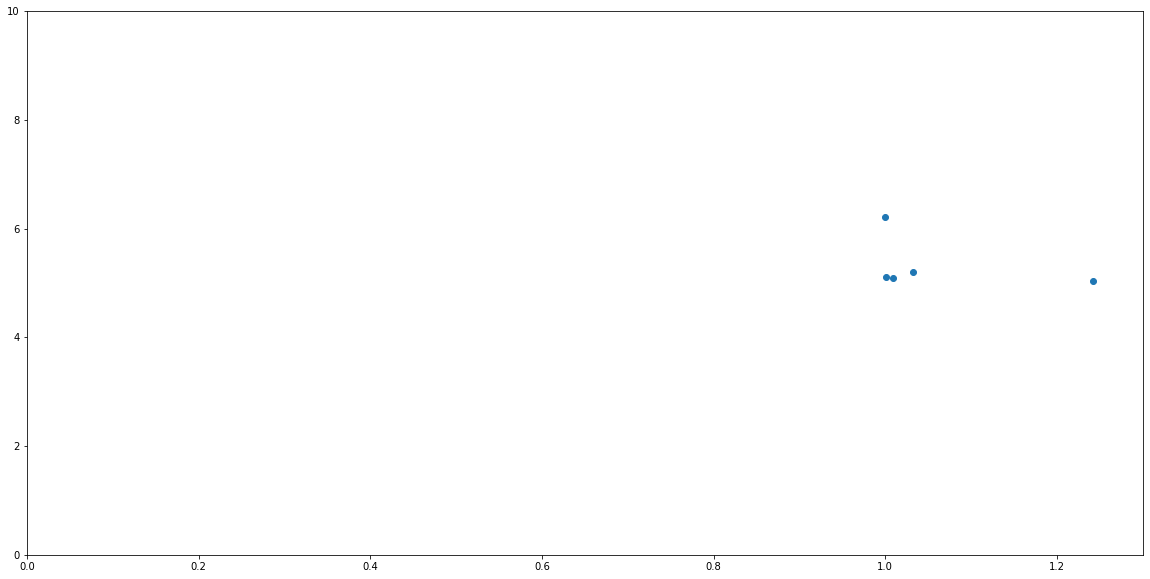

In [7]:
plt.figure(figsize=(20,10))
plt.xlim([0,1.3])
plt.ylim([0,10])
plt.scatter(fourier.asym_score,abs(fourier['signal/noise']))
#plt.scatter(lowess.asym_score,abs(lowess['signal/noise']))
#plt.scatter(median.asym_score,abs(median['signal/noise']))

In [8]:
lowess_in_fourier = []
median_in_fourier = []
for i in fourier.file:
    lowess_in_fourier.append(lowess[lowess.file == i])
    median_in_fourier.append(median[median.file == i])

In [9]:
lowess_in_fourier = np.array(lowess_in_fourier)
lowess_in_fourier = lowess_in_fourier.reshape(5,10)
lowess_in_fourier = pd.DataFrame(lowess_in_fourier)
lowess_in_fourier.columns = ['file','signal','signal/noise','time','asym_score','width1','width2','duration','depth','transit_prob']
lowess_in_fourier['method'] = 'lowess'

In [10]:
lowess_in_fourier

,file,signal,signal/noise,time,asym_score,width1,width2,duration,depth,transit_prob,method
0,tesslc_139583463.pkl,-27.878464,-6.986416,1473.412388,1.170601,0.076536,0.212826,0.541659,151036.192881,maybeTransit,lowess
1,tesslc_143208607.pkl,-8.355763,-5.948478,1479.493235,0.945183,0.07437,0.036064,0.166666,114721.783671,artefact,lowess
2,tesslc_140280491.pkl,-5.347794,-7.180052,1489.659801,-2.0,-2.0,-2.0,0.104165,40325.481106,end,lowess
3,tesslc_393159622.pkl,-6.283184,-5.520018,1487.992969,1.021815,0.116921,0.109111,0.270833,180383.912862,maybeTransit,lowess
4,tesslc_290166659.pkl,-11.532062,-8.132516,1473.453948,1.221569,0.240239,0.003124,0.416659,161605.95443,maybeTransit,lowess


In [11]:
median_in_fourier = np.array(median_in_fourier)
median_in_fourier = median_in_fourier.reshape(5,10)
median_in_fourier = pd.DataFrame(median_in_fourier)
median_in_fourier.columns = ['file','signal','signal/noise','time','asym_score','width1','width2','duration','depth','transit_prob']
median_in_fourier['method'] = 'median'

In [12]:
median_in_fourier

,file,signal,signal/noise,time,asym_score,width1,width2,duration,depth,transit_prob,method
0,tesslc_139583463.pkl,-21.475973,-7.845419,1473.474887,1.015337,0.302178,0.0027,0.437494,150956.352242,maybeTransit,median
1,tesslc_143208607.pkl,-7.340597,-4.950765,1479.514068,1.158676,0.051453,0.123467,0.187499,114726.006803,artefact,median
2,tesslc_140280491.pkl,-4.748132,-5.303808,1489.659801,-2.0,-2.0,-2.0,0.104165,40325.481106,end,median
3,tesslc_393159622.pkl,-6.427803,-6.103948,1487.951303,1.038444,0.138281,0.102147,0.291666,180413.672465,maybeTransit,median
4,tesslc_290166659.pkl,-10.901925,-6.933561,1473.453948,1.11883,0.262279,0.013729,0.416659,161605.95443,maybeTransit,median


In [29]:
import plotly.express as px
import plotly

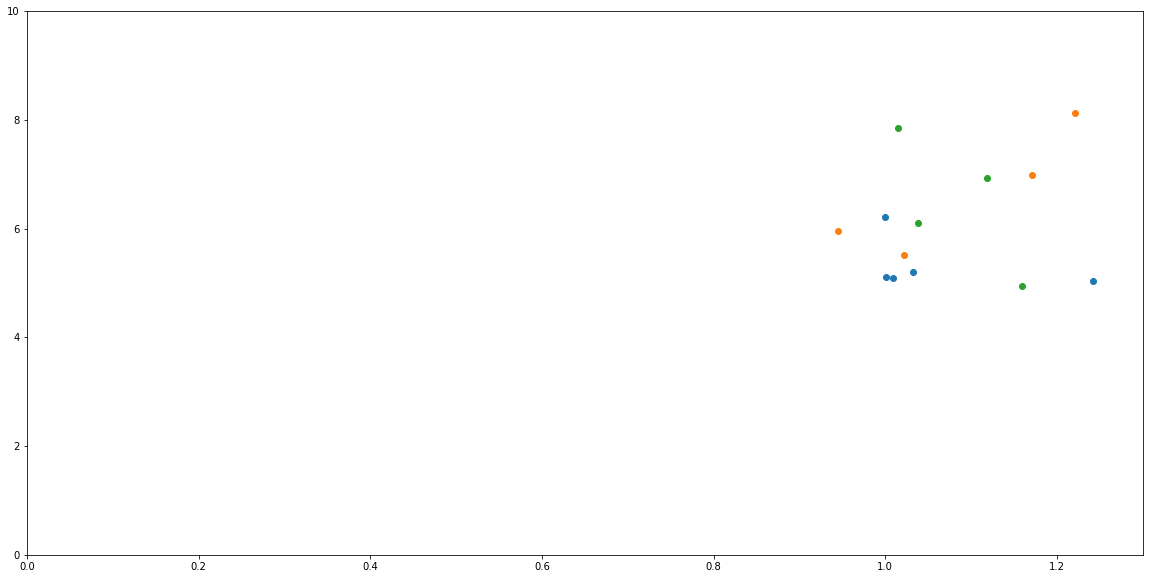

In [15]:
plt.figure(figsize=(20,10))
plt.xlim([0,1.3])
plt.ylim([0,10])
plt.scatter(fourier.asym_score,abs(fourier['signal/noise']))
plt.scatter(lowess_in_fourier.asym_score,abs(lowess_in_fourier['signal/noise']))
plt.scatter(median_in_fourier.asym_score,abs(median_in_fourier['signal/noise']))

In [24]:
total_df = pd.concat([fourier,lowess_in_fourier,median_in_fourier]).reset_index(drop=True)

In [31]:
px.scatter(total_df,x='asym_score',y='signal/noise')

In [36]:
for f in glob.glob('plots/'):
    if any([x in f for x in total_df.file]):
        print(f)
    else:

        print("did not find")

did not find


In [61]:
total_df.file[0].split('_')[1].split('.pkl')[0] in glob.glob('plots/TIC*_*.pdf')

False

In [58]:
total_df.file[0].split('_')[1].split('.pkl')[0]

'139583463'

In [59]:
glob.glob('plots/*')

['plots/TIC287909665_fourier.pdf',
 'plots/TIC234273829_lowess.pdf',
 'plots/TIC299585416_median.pdf',
 'plots/TIC46310087_fourier.pdf',
 'plots/TIC287538204_median.pdf',
 'plots/TIC59725791_lowess.pdf',
 'plots/TIC33746198_fourier.pdf',
 'plots/TIC93238321_fourier.pdf',
 'plots/TIC382031115_fourier.pdf',
 'plots/TIC148094909_median.pdf',
 'plots/TIC143118226_median.pdf',
 'plots/TIC346645362_median.pdf',
 'plots/TIC235495815_fourier.pdf',
 'plots/TIC425083216_lowess.pdf',
 'plots/TIC161638202_fourier.pdf',
 'plots/TIC33870260_lowess.pdf',
 'plots/TIC59468211_lowess.pdf',
 'plots/TIC350929538_lowess.pdf',
 'plots/TIC30927032_fourier.pdf',
 'plots/TIC317025501_lowess.pdf',
 'plots/TIC146989855_median.pdf',
 'plots/TIC220480357_lowess.pdf',
 'plots/TIC431479984_lowess.pdf',
 'plots/TIC442958626_lowess.pdf',
 'plots/TIC24885948_median.pdf',
 'plots/TIC176450574_lowess.pdf',
 'plots/TIC302536575_fourier.pdf',
 'plots/TIC31195433_fourier.pdf',
 'plots/TIC265454195_fourier.pdf',
 'plots/TIC1